In [1]:
import pandas as pd
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
default_colors = {
    "indigo": "#332288",
    "cyan": "#88CCEE",
    "teal": "#44AA99",
    "green": "#117733",
    "olive": "#999933",
    "sand": "#DDCC77",
    "rose": "#CC6677",
    "wine": "#882255",
    "purple": "#AA4499",
    "grey": "#DDDDDD",
}

eval_setting_map = {
    "identity": default_colors["wine"],
    "CAROT": default_colors["cyan"],
    "conCAROT": default_colors["indigo"],
    "conCAROT-OOD": default_colors["indigo"],
    "within condition": default_colors["green"],
}

geneset_map = {
    "functional": default_colors["olive"],
    "functional+score": default_colors["rose"],
    "HVG": default_colors["teal"],
    "random": default_colors["sand"],
}

subset_map = {
    "CD4": default_colors["teal"],
    "CD8": default_colors["purple"],
}

ot_map = {
    "source": default_colors["cyan"],
    "target": default_colors["sand"],
    "transport": default_colors["rose"],
    "rest": default_colors["grey"]
}


In [3]:
sns.set(font="Arial")
sns.set_context("paper")
sns.set_style("whitegrid")
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['ytick.left'] = True

In [12]:
base_fig_dir = "/Users/alicedriessen/Library/CloudStorage/Box-Box/LegacyFromOldColleagues/Alice/CAR_Tcells/Figures/cmonge/ood/"

with open("/Users/alicedriessen/Box/LegacyFromOldColleagues/Alice/CAR_Tcells/Model/OT/CAR_variants.txt", "r") as f:
    cars = f.read().splitlines()

In [6]:
base_exp_dir = "/Users/alicedriessen/Library/CloudStorage/Box-Box/LegacyFromOldColleagues/Alice/CAR_Tcells/Model/conditional-monge/experiments/cmonge_ood/LN_True_grad_acc_4_cosine/"
experiment_order = ["homogeneous", "conCAROT-OOD", "identity", "within condition"]

In [7]:
all_mean_metrics = []
for subset in ["CD4", "CD8"]:
    for car in cars:
        if car in ["NA-NA-z", "NA-NA-NA"]:
            continue
        else:
            with open(f"{base_exp_dir}{subset}_esm_XL_tail_dim_FuncScore/NA-NA-NA_{car}/logs.yaml") as stream:
                logs = yaml.safe_load(stream)
            if len(logs["experiments"])==68:
                print("using only the first 34 logs")
                logs["experiments"]=logs["experiments"][:34]
            print(subset, car, len(logs["experiments"]))
            
            for i in range(len(logs["experiments"])):
                eval_setting = experiment_order[i]
                for condition, results in logs["experiments"][i]["valid-set"].items():
                    res = pd.Series(results["mean_statistics"])
                    res = res.reset_index(drop=False).rename(columns={"index": "metric", 0: "score"})
                    res["eval_car"] = condition
                    res["eval_setting"] = eval_setting
                    res["subset"] = subset
                    all_mean_metrics.append(res)

CD4 41BB-41BB-z 4
CD4 41BB-CD28-z 4
CD4 41BB-CD40-z 4
CD4 41BB-CTLA4-z 4
CD4 41BB-IL15RA-z 4
CD4 41BB-NA-z 4
CD4 CD28-41BB-z 4
CD4 CD28-CD28-z 4
CD4 CD28-CD40-z 4
CD4 CD28-CTLA4-z 4
CD4 CD28-IL15RA-z 4
CD4 CD28-NA-z 4
CD4 CD40-41BB-z 4
CD4 CD40-CD28-z 4
CD4 CD40-CD40-z 4
CD4 CD40-CTLA4-z 4
CD4 CD40-IL15RA-z 4
CD4 CD40-NA-z 4
CD4 CTLA4-41BB-z 4
CD4 CTLA4-CD28-z 4
CD4 CTLA4-CD40-z 4
CD4 CTLA4-CTLA4-z 4
CD4 CTLA4-IL15RA-z 4
CD4 CTLA4-NA-z 4
CD4 IL15RA-41BB-z 4
CD4 IL15RA-CD28-z 4
CD4 IL15RA-CD40-z 4
CD4 IL15RA-CTLA4-z 4
CD4 IL15RA-IL15RA-z 4
CD4 IL15RA-NA-z 4
CD8 41BB-41BB-z 4
CD8 41BB-CD28-z 4
CD8 41BB-CD40-z 4
CD8 41BB-CTLA4-z 4
CD8 41BB-IL15RA-z 4
CD8 41BB-NA-z 4
CD8 CD28-41BB-z 4
CD8 CD28-CD28-z 4
CD8 CD28-CD40-z 4
CD8 CD28-CTLA4-z 4
CD8 CD28-IL15RA-z 4
CD8 CD28-NA-z 4
CD8 CD40-41BB-z 4
CD8 CD40-CD28-z 4
CD8 CD40-CD40-z 4
CD8 CD40-CTLA4-z 4
CD8 CD40-IL15RA-z 4
CD8 CD40-NA-z 4
CD8 CTLA4-41BB-z 4
CD8 CTLA4-CD28-z 4
CD8 CTLA4-CD40-z 4
CD8 CTLA4-CTLA4-z 4
CD8 CTLA4-IL15RA-z 4
CD8 CTLA4-NA

In [8]:
res = pd.concat(all_mean_metrics).reset_index(drop=True)
res = res[~res["eval_car"].isin(["NA-NA-NA", "NA-NA-z"])]
res

,metric,score,eval_car,eval_setting,subset
0,mean_wasserstein,5.655046,41BB-CD28-z,homogeneous,CD4
1,mean_mmd,0.026761,41BB-CD28-z,homogeneous,CD4
2,mean_sinkhorn div,5.171777,41BB-CD28-z,homogeneous,CD4
3,mean_monge_gap,11.388451,41BB-CD28-z,homogeneous,CD4
4,mean_drug_signature,0.942221,41BB-CD28-z,homogeneous,CD4
...,...,...,...,...,...
12235,mean_mmd,0.012517,IL15RA-NA-z,within condition,CD8
12236,mean_sinkhorn div,5.679140,IL15RA-NA-z,within condition,CD8
12237,mean_monge_gap,12.339099,IL15RA-NA-z,within condition,CD8
12238,mean_drug_signature,0.805206,IL15RA-NA-z,within condition,CD8


In [9]:
sel_res = res[res["eval_setting"]!="homogeneous"]

In [10]:
sel_cars = ['CD40-CD40-z', "IL15RA-CD40-z", "CD28-CTLA4-z"]
sc_palette = {'CD40-CD40-z': default_colors["sand"],
             "IL15RA-CD40-z": default_colors["cyan"],
             "CD28-CTLA4-z": default_colors["rose"]}

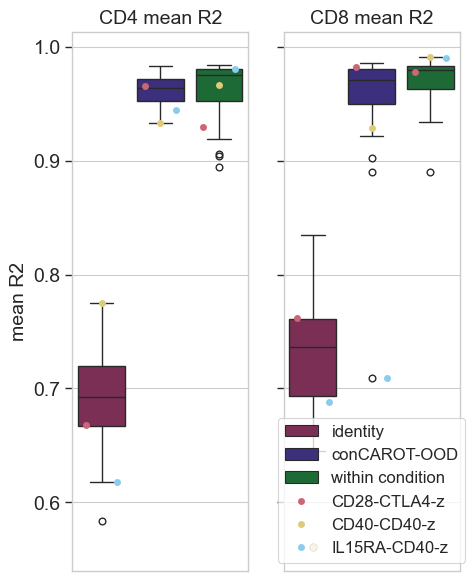

In [13]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(5,7))
for i, subset in enumerate(["CD4", "CD8"]):
    plt_data = sel_res[(sel_res["subset"]==subset)&(sel_res["metric"]=="mean_r2")]
    plt_data = plt_data.rename(columns={"eval_setting": ""})
    sns.boxplot(data=plt_data, y="score", hue="", x="", ax=axes[i], palette=eval_setting_map,
               hue_order=["identity", "conCAROT-OOD", "within condition"], dodge=False, order = ["identity", "conCAROT-OOD", "within condition"],
               legend=True)
    sns.stripplot(data=plt_data[plt_data['eval_car'].isin(sel_cars)], y="score", x = "", ax=axes[i], hue="eval_car", dodge=True,
                  palette=sc_palette)
    axes[i].set_title(f"{subset} mean R2", fontsize=14)
    axes[i].set_ylabel("mean R2", fontsize=14)
    axes[i].tick_params(which="both", axis="both", labelsize=14)
    axes[i].set_xticks([])

    
axes[0].get_legend().remove()
axes[1].legend(fontsize=12, loc="lower center")
plt.savefig(f"{base_fig_dir}R2_performance.pdf", bbox_inches="tight")

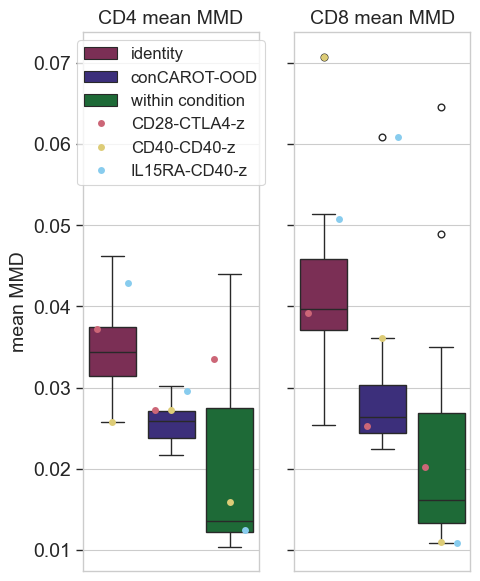

In [14]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(5,7))
for i, subset in enumerate(["CD4", "CD8"]):
    plt_data = sel_res[(sel_res["subset"]==subset)&(sel_res["metric"]=="mean_mmd")]
    plt_data = plt_data.rename(columns={"eval_setting": ""})
    sns.boxplot(data=plt_data, y="score", hue="", x="", ax=axes[i], palette=eval_setting_map,
               hue_order=["identity", "conCAROT-OOD", "within condition"], dodge=False, order = ["identity", "conCAROT-OOD", "within condition"],
               legend=True)
    sns.stripplot(data=plt_data[plt_data['eval_car'].isin(sel_cars)], y="score", x = "", ax=axes[i], hue="eval_car", dodge=True,
                  palette=sc_palette)
    axes[i].set_title(f"{subset} mean MMD", fontsize=14)
    axes[i].set_ylabel("mean MMD", fontsize=14)
    axes[i].tick_params(which="both", axis="both", labelsize=14)
    axes[i].set_xticks([])

    
axes[1].get_legend().remove()
axes[0].legend(fontsize=12, loc="upper center")
plt.savefig(f"{base_fig_dir}MMD_performance.pdf", bbox_inches="tight")

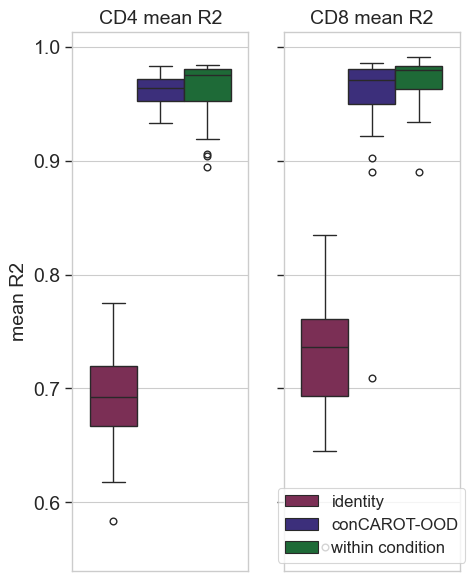

In [15]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(5,7))
for i, subset in enumerate(["CD4", "CD8"]):
    plt_data = sel_res[(sel_res["subset"]==subset)&(sel_res["metric"]=="mean_r2")]
    plt_data = plt_data.rename(columns={"eval_setting": ""})
    sns.boxplot(data=plt_data, y="score", hue="", ax=axes[i], palette=eval_setting_map,
               hue_order=["identity", "conCAROT-OOD", "within condition"])
    axes[i].set_title(f"{subset} mean R2", fontsize=14)
    axes[i].set_ylabel("mean R2", fontsize=14)
    axes[i].tick_params(which="both", axis="both", labelsize=14)

    
axes[0].get_legend().remove()
axes[1].legend(fontsize=12, loc="lower center")
plt.tick_params(which="both", axis="both", labelsize=14)
# plt.savefig(f"{base_fig_dir}R2_performance.pdf", bbox_inches="tight")

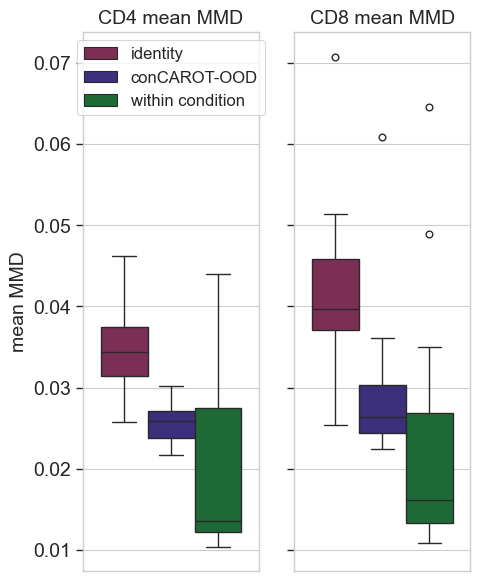

In [16]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(5,7))
for i, subset in enumerate(["CD4", "CD8"]):
    plt_data = sel_res[(sel_res["subset"]==subset)&(sel_res["metric"]=="mean_mmd")]
    plt_data = plt_data.rename(columns={"eval_setting": ""})
    sns.boxplot(data=plt_data, y="score", hue="", ax=axes[i], palette=eval_setting_map,
               hue_order=["identity", "conCAROT-OOD", "within condition"])
    axes[i].set_title(f"{subset} mean MMD", fontsize=14)
    axes[i].set_ylabel("mean MMD", fontsize=14)
    axes[i].tick_params(which="both", axis="both", labelsize=14)

axes[1].get_legend().remove()
axes[0].legend(fontsize=12, loc="upper center")
plt.tick_params(which="both", axis="both", labelsize=14)
# plt.savefig(f"{base_fig_dir}MMD_performance.pdf", bbox_inches="tight")